In [1]:
import tkinter as tk
from tkinter.filedialog import askopenfilename
import pandas as pd
import numpy as npW
import FlowCytometryTools
from FlowCytometryTools import test_data_dir, test_data_file
from FlowCytometryTools import FCMeasurement
from datetime import date
import matplotlib.pyplot as plt
from DensityPlot.plot import density2d
from sklearn.preprocessing import StandardScaler
from sys import exit
from sklearn.cluster import OPTICS
import fcsparser
import time
from collections import Counter
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import umap
from matplotlib.lines import Line2D

from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import umap
from matplotlib.lines import Line2D
import seaborn as sns
import umap.umap_ as umap



2023-05-29 15:06:15.718147: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-29 15:06:16.228879: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 15:06:25.415998: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [59]:
# Visualize pathway

fcspath="antibiotic/CHO+antibiotic/2023-04-28.0104.fcs"

In [60]:
print(f" Pathway\n{fcspath}")

sample = FCMeasurement(ID='Test Sample', datafile=fcspath)

# get the start time
st = time.time()

 Pathway
antibiotic/CHO+antibiotic/2023-04-28.0104.fcs


In [61]:
# Visualize Data(figure 1)



print(f"Shape: number of measurement, number of features\n{sample.shape}")

print(f"Channels name\n{sample.channel_names}")

print(f"Channels\n{sample.channels}")

print(f"Data\n{sample.data}")

sample_channel_names=[i for i in sample.channel_names]
print(f"Channels name: {sample_channel_names}")

Shape: number of measurement, number of features
(6540, 19)
Channels name
('HDR-T', 'HDR-CE', 'HDR-SE', 'HDR-V', 'FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'VioBlue-A', 'VioBlue-H', 'VioBlue-W', 'Calcein-A', 'Calcein-H', 'Calcein-W', 'PI-A', 'PI-H', 'PI-W')
Channels
                  $PnN  $PnB        $PnE               $PnD     $PnR $PnG  \
Channel Number                                                              
1                 Time    32  [0.0, 0.0]   Linear,0,42.4663  42.4663    1   
2               HDR-CE    32  [0.0, 0.0]      Linear,0,1000     1000    1   
3               HDR-SE    32  [0.0, 0.0]      Linear,0,1000     1000    1   
4                HDR-V    32  [0.0, 0.0]        Linear,0,70       70    1   
5                FSC-A    32  [0.0, 0.0]  Logarithmic,4,0.1     1000    1   
6                FSC-H    32  [0.0, 0.0]  Logarithmic,4,0.1     1000    1   
7                FSC-W    32  [0.0, 0.0]  Logarithmic,4,0.1     1000    1   
8                SSC-A    32 

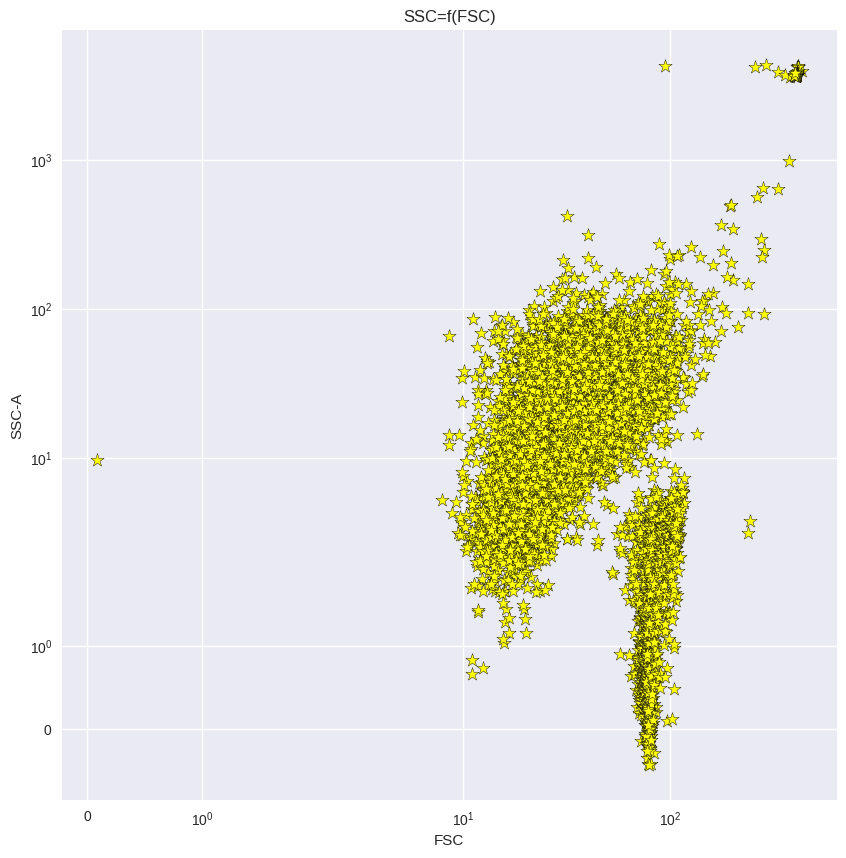

In [62]:
#SSC-A/FSCu_A plot

x_fsc = list(sample[sample_channel_names[4]])
y_ssc = list(sample[sample_channel_names[7]])

plt.figure(figsize=(10,10))

plt.style.use('seaborn')
plt.scatter(x_fsc,y_ssc,marker="*",s=100,edgecolors="black",c="yellow")
plt.title(f"SSC=f(FSC)")
plt.xlabel("FSC")
plt.xscale("symlog")
plt.yscale("symlog")

plt.ylabel("SSC-A")
plt.show()

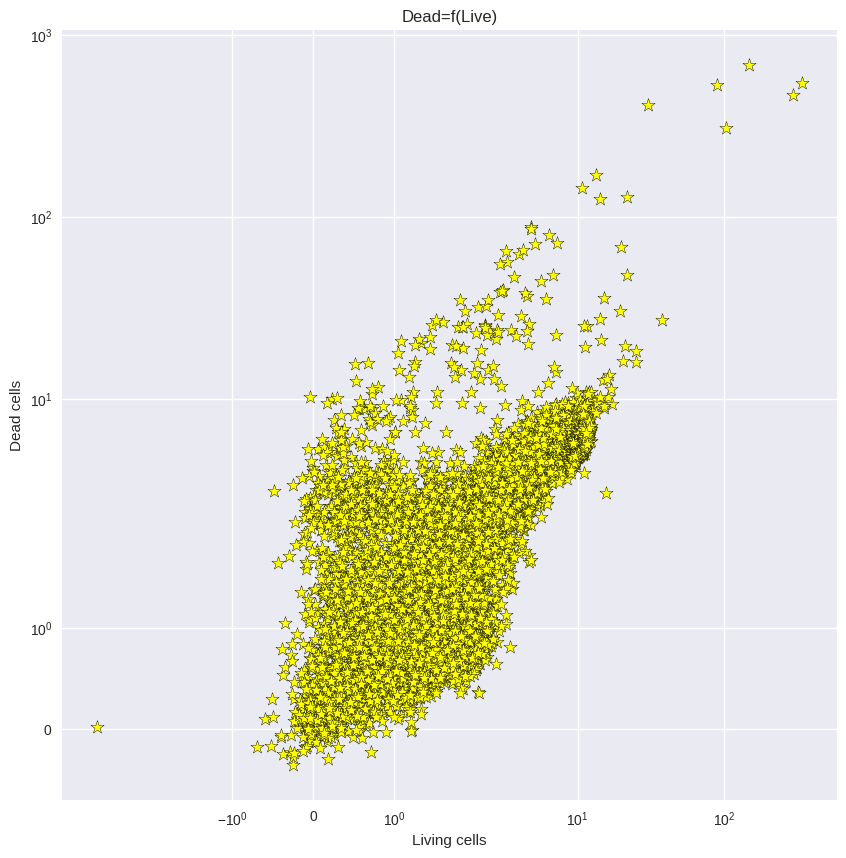

In [63]:
# Calcein/PI plot

x_calcein = list(sample[sample_channel_names[13]])
y_PI = list(sample[sample_channel_names[16]])

plt.figure(figsize=(10,10))

plt.style.use('seaborn')
plt.scatter(x_calcein,y_PI,marker="*",s=100,edgecolors="black",c="yellow")
plt.title(f"Dead=f(Live)")
plt.xlabel("Living cells")
plt.xscale("symlog")
plt.yscale("symlog")

plt.ylabel("Dead cells")
plt.show()

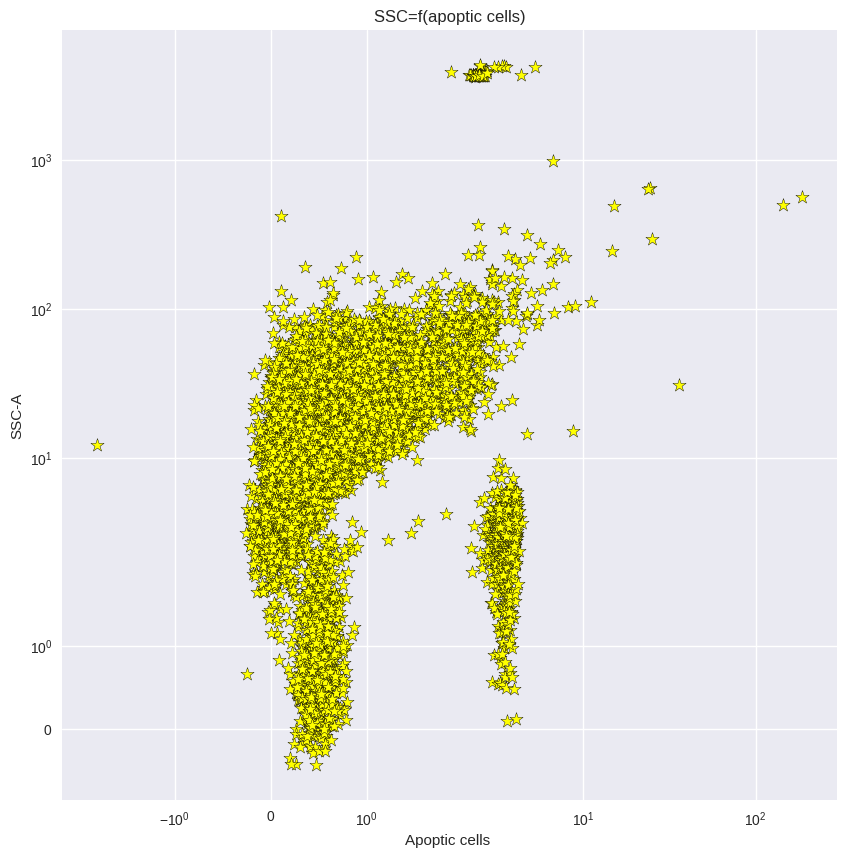

In [64]:
#SSC-A/Vio-Blu_A plot

x_vioblu = list(sample[sample_channel_names[10]])
y_ssc = list(sample[sample_channel_names[7]])

plt.figure(figsize=(10,10))

plt.style.use('seaborn')
plt.scatter(x_vioblu,y_ssc,marker="*",s=100,edgecolors="black",c="yellow")
plt.title(f"SSC=f(apoptic cells)")
plt.xlabel("Apoptic cells ")
plt.xscale("symlog")
plt.yscale("symlog")

plt.ylabel("SSC-A")
plt.show()

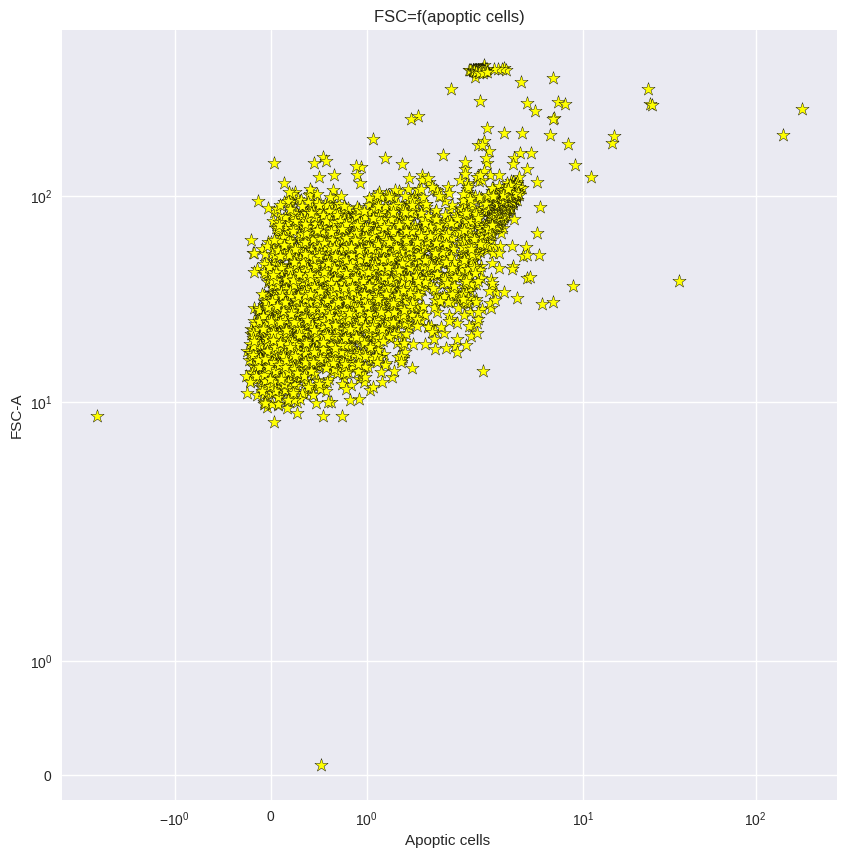

In [65]:
#FSC-A/Vio-Blu_A plot

x_vioblu = list(sample[sample_channel_names[10]])
y_fsc = list(sample[sample_channel_names[4]])

plt.figure(figsize=(10,10))

plt.style.use('seaborn')
plt.scatter(x_vioblu,y_fsc,marker="*",s=100,edgecolors="black",c="yellow")
plt.title(f"FSC=f(apoptic cells)")
plt.xlabel("Apoptic cells ")
plt.xscale("symlog")
plt.yscale("symlog")

plt.ylabel("FSC-A")
plt.show()

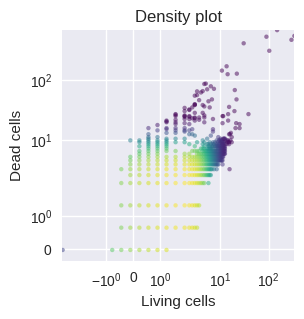

In [66]:
# Density plot(figure2)
value_all_data=sample[[sample_channel_names[4],sample_channel_names[5],sample_channel_names[6],sample_channel_names[7],sample_channel_names[8],sample_channel_names[9],sample_channel_names[10],sample_channel_names[11],sample_channel_names[12],sample_channel_names[13],sample_channel_names[14], sample_channel_names[15],sample_channel_names[16],sample_channel_names[17],sample_channel_names[18]][:]].values

value_calc_PI_data=sample[[sample_channel_names[13],sample_channel_names[16]][:]].values

fig, ax = density2d(value_calc_PI_data, alpha=0.5, mode='scatter', bins=1024,xscale="symlog", yscale="symlog")
plt.title("Density plot")
plt.xlabel("Living cells")

plt.ylabel("Dead cells")
plt.show()

In [67]:
#Preprocessing

value_all_data = StandardScaler().fit_transform(value_all_data)

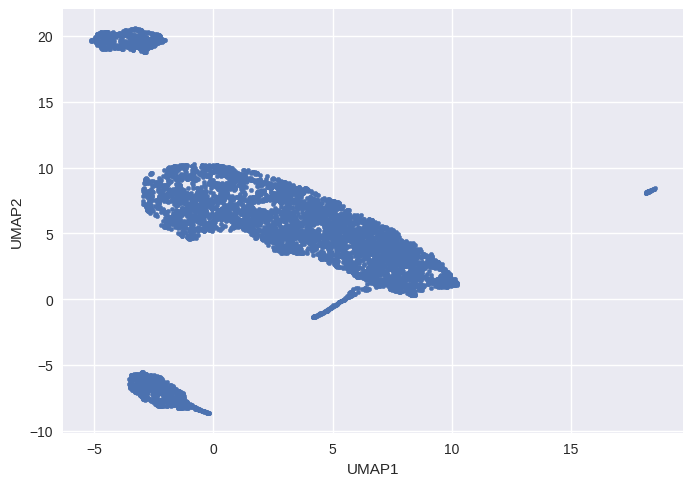

In [68]:
#UMAP

umap_model = umap.UMAP(n_neighbors=10, n_components=2, random_state=42)
umap_data = umap_model.fit_transform(value_all_data)
plt.scatter(umap_data[:, 0], umap_data[:, 1], s=10)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

In [69]:
#DBSCAN

umap_data_array=np.array(umap_data)

umap_eps_values = np.arange(0.8,1.4,0.1) 

umap_min_samples = np.arange(98,101)  

In [70]:

umap_no_of_clusters = []
umap_sil_score = []
umap_epsvalues = []
umap_min_samp = []

In [71]:
for p in umap_eps_values:
    for o in umap_min_samples:
        umap_dbscan_cluster = DBSCAN(eps=p, min_samples=o).fit(umap_data_array)
        umap_epsvalues.append(p)
        umap_min_samp.append(o)
        labels = umap_dbscan_cluster.labels_
        if len(np.unique(labels))==1:
            umap_no_of_clusters.append(1)
            umap_sil_score.append("NaN")
        else:
            umap_no_of_clusters.append(len(np.unique(labels)))
            umap_sil_score.append(silhouette_score(umap_data_array,labels))   

In [72]:
umap_eps_min = list(zip(umap_no_of_clusters, umap_sil_score, umap_epsvalues, umap_min_samp))

umap_eps_min_df = pd.DataFrame(umap_eps_min, columns=['no_of_clusters', 'silhouette_score', 'epsilon_values', 'minimum_points'])

print(umap_eps_min_df)

    no_of_clusters  silhouette_score  epsilon_values  minimum_points
0                4          0.496637             0.8              98
1                4          0.496637             0.8              99
2                4          0.496637             0.8             100
3                4          0.524841             0.9              98
4                4          0.524841             0.9              99
5                4          0.520978             0.9             100
6                5          0.351193             1.0              98
7                4          0.531629             1.0              99
8                4          0.531629             1.0             100
9                4          0.641463             1.1              98
10               4          0.641463             1.1              99
11               4          0.641463             1.1             100
12               4          0.641463             1.2              98
13               4          0.6414

In [73]:
# Withdraw rows with NaN
umap_eps_min_df = umap_eps_min_df.apply (pd.to_numeric, errors='coerce')
umap_eps_min_df= umap_eps_min_df.dropna()

print (umap_eps_min_df)

    no_of_clusters  silhouette_score  epsilon_values  minimum_points
0                4          0.496637             0.8              98
1                4          0.496637             0.8              99
2                4          0.496637             0.8             100
3                4          0.524841             0.9              98
4                4          0.524841             0.9              99
5                4          0.520978             0.9             100
6                5          0.351193             1.0              98
7                4          0.531629             1.0              99
8                4          0.531629             1.0             100
9                4          0.641463             1.1              98
10               4          0.641463             1.1              99
11               4          0.641463             1.1             100
12               4          0.641463             1.2              98
13               4          0.6414

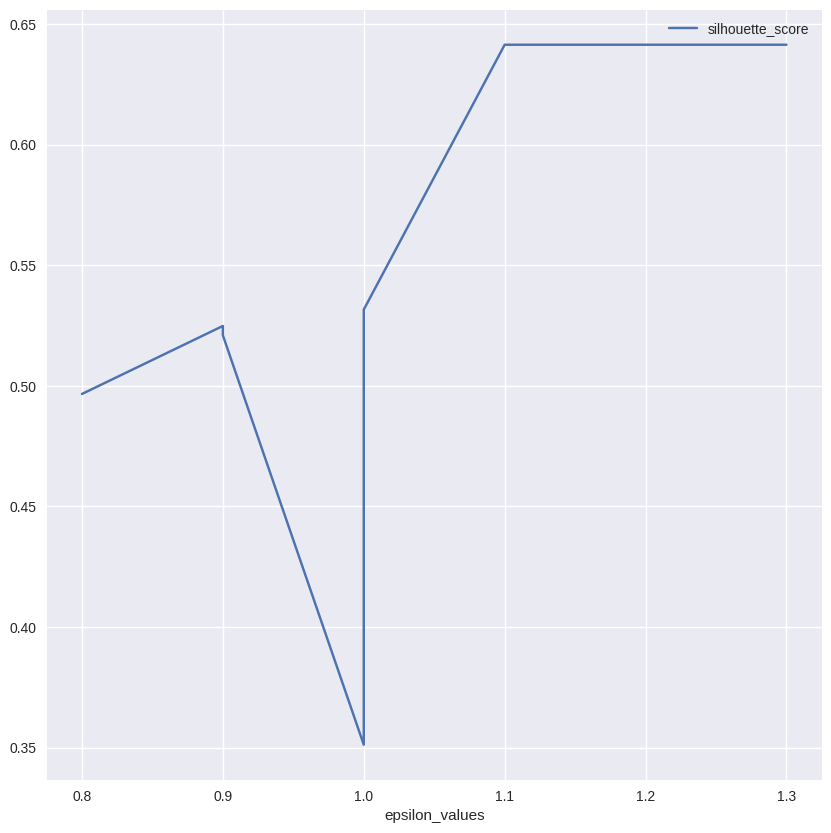

In [74]:
#Plot 2D

umap_eps_min_df .plot(x="epsilon_values", y="silhouette_score",
        kind="line", figsize=(10, 10))

plt.show()


In [75]:
# Select  row max silouhette score
umap_max_eps_minpoints=umap_eps_min_df[umap_eps_min_df.silhouette_score == umap_eps_min_df.silhouette_score.max()]

print(umap_max_eps_minpoints)

umap_max_eps_minpoints = umap_max_eps_minpoints.reset_index()
print(umap_max_eps_minpoints)

    no_of_clusters  silhouette_score  epsilon_values  minimum_points
9                4          0.641463             1.1              98
10               4          0.641463             1.1              99
11               4          0.641463             1.1             100
12               4          0.641463             1.2              98
13               4          0.641463             1.2              99
14               4          0.641463             1.2             100
15               4          0.641463             1.3              98
16               4          0.641463             1.3              99
17               4          0.641463             1.3             100
   index  no_of_clusters  silhouette_score  epsilon_values  minimum_points
0      9               4          0.641463             1.1              98
1     10               4          0.641463             1.1              99
2     11               4          0.641463             1.1             100
3     12  

In [76]:
#Assign eps and min points

epsilon=umap_max_eps_minpoints.iat[0,3]
min_samples=umap_max_eps_minpoints.iat[0,4]

print(f"Best epsilon= {epsilon}")
print(f"Best min_points= {min_samples}")

Best epsilon= 1.1
Best min_points= 98


In [77]:
umap_data_prepared=np.array(umap_data)


db = DBSCAN(eps=epsilon, min_samples=min_samples, n_jobs=-1).fit(umap_data_prepared)
labels = db.labels_
dbscan_labels = db.fit_predict(umap_data_prepared)

In [78]:
from collections import Counter
from sklearn.metrics import silhouette_score
res = Counter(labels)
number_clusters = len(np.unique(labels) )
number_noise = np.sum(np.array(labels) == -1, axis=0)
SS=len(umap_data_prepared)- res[1]-number_noise
print(f'Estimated number of cells: {len(umap_data_prepared)- res[1]-number_noise}')

Estimated number of cells: 5800


In [79]:
print('Estimated number of clusters: %d' % number_clusters)

Estimated number of clusters: 4


In [80]:
print('Estimated number of noise points: %d' % number_noise)

Estimated number of noise points: 61


In [81]:
sil_score=silhouette_score(umap_data_prepared, db.fit_predict(umap_data_prepared))
if sil_score<0:
    print("Clustering failed!!")
print(f'Silhouette score: {sil_score}')


print(labels[:100])

Silhouette score: 0.6414631605148315
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


In [82]:
for i in range(number_clusters):
    print(f"Cluster {i}: {res[i]}")

Cluster 0: 5300
Cluster 1: 679
Cluster 2: 500
Cluster 3: 0


In [83]:
import matplotlib.pyplot as plt
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

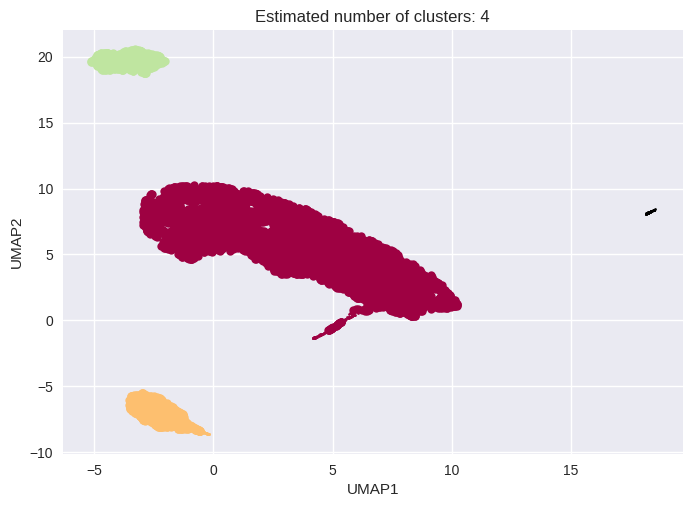

In [84]:
#Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
labelss = {0: "Cluster 1", 1: "Cluster 2", 2: "Cluster 3", 3: "Cluster 4"}
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = umap_data_prepared[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    xy = umap_data_prepared[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=2,
    )

plt.title("Estimated number of clusters: %d" % number_clusters)
# plt.xscale("symlog")
# plt.yscale("symlog")
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

In [85]:
clustered = (labels >= 0)
print(f"Clustered data: {round(np.sum(clustered)*100 / value_all_data.shape[0],2)} %")

Clustered data: 99.07 %


In [86]:
# Number of clusters in labels, ignoring noise if present.
from sklearn.metrics import silhouette_samples, silhouette_score
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
from collections import Counter
res = Counter(labels)
summe=0
for i in range(n_clusters_):
    print(f"number of cells in cluster {i}: {res[i]}")
    summe+=res[i]
    


print(umap_data_prepared)

number of cells in cluster 0: 5300
number of cells in cluster 1: 679
number of cells in cluster 2: 500
[[18.475296    8.398663  ]
 [18.360834    8.30476   ]
 [18.142605    8.100547  ]
 ...
 [-0.5793229   6.857999  ]
 [-0.46184567  7.4074135 ]
 [ 6.6110044   5.9894633 ]]


In [87]:
umap_data_prepared_dataframe = pd.DataFrame(umap_data_prepared, columns = ['UMAP1','UMAP2'])
print(umap_data_prepared_dataframe)



          UMAP1     UMAP2
0     18.475296  8.398663
1     18.360834  8.304760
2     18.142605  8.100547
3     18.417542  8.344137
4     18.381727  8.324814
...         ...       ...
6535   9.690939  1.380419
6536   5.243247  3.918214
6537  -0.579323  6.857999
6538  -0.461846  7.407413
6539   6.611004  5.989463

[6540 rows x 2 columns]


In [88]:
umap_data_prepared_dataframe["label"]=np.array(labels[:])

raw_data_prepared=pd.concat([sample.data, umap_data_prepared_dataframe], axis = 1)

raw_data_prepared_1= raw_data_prepared
print(raw_data_prepared_1)
print(raw_data_prepared_1.columns)
print(raw_data_prepared_1["PI-A"])

          HDR-T   HDR-CE   HDR-SE      HDR-V       FSC-A      FSC-H  \
0      0.033773  0.00001  0.00001   0.187000  413.313782  84.938766   
1      0.033800  0.00002  0.00002   0.187000  428.811676  90.012962   
2      0.033841  0.00003  0.00003   0.187000  376.126373  99.617958   
3      0.033857  0.00004  0.00004   0.187000   94.694931  45.175819   
4      0.033898  0.00005  0.00005   0.187000  328.453552  68.599258   
...         ...      ...      ...        ...         ...        ...   
6535  42.374092  0.06536  0.06536  70.187004   12.869205  24.589025   
6536  42.418690  0.06537  0.06537  70.187004   26.782831  20.353662   
6537  42.427910  0.06538  0.06538  70.187004   60.966801  53.260944   
6538  42.432564  0.06539  0.06539  70.187004   59.506042  52.076817   
6539  42.466301  0.06540  0.06540  70.187004    0.086919  16.344690   

            FSC-W        SSC-A        SSC-H        SSC-W  ...    VioBlue-W  \
0     2433.010254  4240.269531   874.304138  2424.939941  ...  1711.2

In [89]:
print(f"number of measurements = {len(raw_data_prepared_1)}")

number of measurements = 6540


In [90]:
# Describe data
raw_data_prepared_2=raw_data_prepared_1.groupby('label').describe()
print(raw_data_prepared_1.groupby('label').describe())

        HDR-T                                                        \
        count       mean        std       min        25%        50%   
label                                                                 
-1       61.0   0.034316   0.000214  0.033773   0.034218   0.034324   
 0     5300.0  20.352877  12.391459  0.128398   9.655344  19.221098   
 1      679.0   0.459321   3.240201  0.157862   0.175809   0.178892   
 2      500.0  40.472507   2.837582  3.986083  40.691637  40.692776   

                             HDR-CE            ...      UMAP1             \
             75%        max   count      mean  ...        75%        max   
label                                          ...                         
-1      0.034458   0.034703    61.0  0.000310  ...  18.310974  18.494967   
 0     31.029656  42.466301  5300.0  0.034073  ...   6.588989  10.226459   
 1      0.181863  42.343197   679.0  0.004383  ...  -1.679531  -0.182985   
 2     40.693939  40.702843   500.0  0.060613 

In [91]:
# Noise cluster

raw_data_prepared_1['label'] = raw_data_prepared_1['label'].replace(-1, 'Noise points')
print(raw_data_prepared_1['label'])

0       Noise points
1       Noise points
2       Noise points
3       Noise points
4       Noise points
            ...     
6535               0
6536               0
6537               0
6538               0
6539               0
Name: label, Length: 6540, dtype: object


In [92]:
#Dataframe without noise points

raw_data_prepared_without_noise_points=raw_data_prepared_1.loc[raw_data_prepared_1['label']!="Noise points"]

print(f"raw_data_prepared_without_noise_points. {raw_data_prepared_without_noise_points}")
print(raw_data_prepared_without_noise_points.columns)

raw_data_prepared_without_noise_points_labeled=raw_data_prepared_without_noise_points.groupby('label').describe()


raw_data_prepared_without_noise_points.           HDR-T   HDR-CE   HDR-SE      HDR-V      FSC-A      FSC-H  \
61     0.128398  0.00062  0.00062   0.187000  16.775755  16.478968   
62     0.157862  0.00063  0.00063   0.187000  57.154991  17.162251   
63     0.162181  0.00064  0.00064   0.187000  63.021286  17.460747   
64     0.163133  0.00065  0.00065   0.187000  74.461876  20.852280   
65     0.163620  0.00066  0.00066   0.187000  60.337986  16.992840   
...         ...      ...      ...        ...        ...        ...   
6535  42.374092  0.06536  0.06536  70.187004  12.869205  24.589025   
6536  42.418690  0.06537  0.06537  70.187004  26.782831  20.353662   
6537  42.427910  0.06538  0.06538  70.187004  60.966801  53.260944   
6538  42.432564  0.06539  0.06539  70.187004  59.506042  52.076817   
6539  42.466301  0.06540  0.06540  70.187004   0.086919  16.344690   

            FSC-W      SSC-A      SSC-H       SSC-W  ...   VioBlue-W  \
61     509.005066   7.621017   9.557856  398.67

In [93]:
#Assigning label to apoptic cells

raw_data_prepared_apoptic_cells_dead=raw_data_prepared_without_noise_points_labeled["PI-A"]
raw_data_prepared_apoptic_cells_living=raw_data_prepared_without_noise_points_labeled["Calcein-A"]
raw_data_prepared_apoptic_cells=raw_data_prepared_without_noise_points_labeled["VioBlue-A"]

print(f" data apoptic dead cells: {raw_data_prepared_apoptic_cells_dead}")
print(f" data apoptic living cells: {raw_data_prepared_apoptic_cells_living}")
print(f" data apoptic cells: {raw_data_prepared_apoptic_cells}")
print(raw_data_prepared_apoptic_cells_dead["50%"].max())

print(raw_data_prepared_apoptic_cells_living["50%"].max())

print(raw_data_prepared_apoptic_cells["50%"].max())

 data apoptic dead cells:         count      mean        std       min       25%       50%       75%  \
label                                                                        
0      5300.0  3.584587  17.970442 -0.358380  1.137602  2.089331  3.404792   
1       679.0  1.027117   0.557070  0.294381  0.689309  0.894747  1.173331   
2       500.0  5.688143   1.003054  2.205301  4.989985  5.546257  6.300169   

              max  
label              
0      683.761353  
1        6.780649  
2        9.323149  
 data apoptic living cells:         count      mean       std       min       25%       50%        75%  \
label                                                                        
0      5300.0  2.503831  7.117610 -4.666771  0.845350  1.762197   3.120290   
1       679.0  1.647498  0.438151  0.813329  1.333281  1.578563   1.904710   
2       500.0  9.913008  1.164894  3.779834  9.241942  9.983149  10.723907   

              max  
label              
0      341.207306  
1   

In [94]:
cluster_dead_apoptic_cells=raw_data_prepared_apoptic_cells_dead["50%"].idxmax(axis=0)
cluster_living_apoptic_cells=raw_data_prepared_apoptic_cells_living["50%"].idxmax(axis=0)
cluster_apoptic_cells=raw_data_prepared_apoptic_cells["50%"].idxmax(axis=0)
print(cluster_dead_apoptic_cells)
print(cluster_living_apoptic_cells)
print(cluster_apoptic_cells)

2
2
2


In [95]:
for i in range(n_clusters_):
    cluster=raw_data_prepared_without_noise_points.loc[raw_data_prepared_without_noise_points['label']==i].groupby('label').describe()
    cluster1=cluster["PI-A"]
    cluster2=cluster["Calcein-A"]
    cluster3=cluster["VioBlue-A"]
    cluster4=cluster["SSC-A"]
    cluster5=cluster["FSC-A"]
    print("Red signal")
    print(cluster1)
    print(cluster1["50%"].values)
    print("Green signal")
    print(cluster2)
    print(cluster2["50%"].values)
    print("Blue signal")
    print(cluster3)
    print(cluster3["50%"].values)
    print("Granularity")
    print(cluster4)
    print(cluster4["50%"].values)
    print("Size")
    print(cluster5)
    print(cluster5["50%"].values)
    print(f"Cluster {i}")
    print("Blue signal, Green signal, Red signal, Granularity, Size")
    print(cluster3["50%"].values, cluster2["50%"].values, cluster1["50%"].values, cluster4["50%"].values, cluster5["50%"].values)

    if  6<cluster1["50%"].values<150 and 90<cluster2["50%"].values<400:
        raw_data_prepared_without_noise_points['label'] = raw_data_prepared_without_noise_points['label'].replace(i, 'Late Apoptic cells')
        raw_data_prepared_1['label'] = raw_data_prepared_1['label'].replace(i, 'Late Apoptic cells')
        
    if 2<cluster2["50%"].values<89 and 10<cluster1["50%"].values<50:
        raw_data_prepared_without_noise_points['label'] = raw_data_prepared_without_noise_points['label'].replace(i, 'Early Apoptic cells')
        raw_data_prepared_1['label'] = raw_data_prepared_1['label'].replace(i, 'Early Apoptic cells')
        
    if cluster4["50%"].values>60 and cluster1["50%"].values<10 and cluster2["50%"].values>10:
        raw_data_prepared_without_noise_points['label'] = raw_data_prepared_without_noise_points['label'].replace(i, 'Oncotic cells')
        raw_data_prepared_1['label'] = raw_data_prepared_1['label'].replace(i, 'Oncotic cells')
        

Red signal
        count      mean        std      min       25%       50%       75%  \
label                                                                       
0      5300.0  3.584587  17.970442 -0.35838  1.137602  2.089331  3.404792   

              max  
label              
0      683.761353  
[2.08933091]
Green signal
        count      mean      std       min      25%       50%      75%  \
label                                                                    
0      5300.0  2.503831  7.11761 -4.666771  0.84535  1.762197  3.12029   

              max  
label              
0      341.207306  
[1.76219666]
Blue signal
        count      mean       std       min       25%       50%       75%  \
label                                                                       
0      5300.0  0.789799  3.380158 -1.810358  0.212854  0.527662  0.988456   

              max  
label              
0      184.718552  
[0.52766171]
Granularity
        count       mean        std       min 

In [96]:
print("Apoptic data labeled")
print(raw_data_prepared_without_noise_points["label"])
print(raw_data_prepared_without_noise_points['label'].value_counts())
print(raw_data_prepared_1['label'].value_counts())

Apoptic data labeled
61      0
62      1
63      1
64      1
65      1
       ..
6535    0
6536    0
6537    0
6538    0
6539    0
Name: label, Length: 6479, dtype: object
0    5300
1     679
2     500
Name: label, dtype: int64
0               5300
1                679
2                500
Noise points      61
Name: label, dtype: int64


In [97]:
#Dataframe without noise points and without Late Apoptic cells
print(raw_data_prepared_without_noise_points['label']!="Late Apoptic cells")
print(raw_data_prepared_without_noise_points)
raw_data_prepared_without_noise_points_and_without_late_apoptic_cells=raw_data_prepared_without_noise_points.loc[raw_data_prepared_without_noise_points['label']!="Late Apoptic cells"]
print(f"raw_data_prepared_without_noise_points_and_without_late_apoptic_cells: {raw_data_prepared_without_noise_points_and_without_late_apoptic_cells}")

61      True
62      True
63      True
64      True
65      True
        ... 
6535    True
6536    True
6537    True
6538    True
6539    True
Name: label, Length: 6479, dtype: bool
          HDR-T   HDR-CE   HDR-SE      HDR-V      FSC-A      FSC-H  \
61     0.128398  0.00062  0.00062   0.187000  16.775755  16.478968   
62     0.157862  0.00063  0.00063   0.187000  57.154991  17.162251   
63     0.162181  0.00064  0.00064   0.187000  63.021286  17.460747   
64     0.163133  0.00065  0.00065   0.187000  74.461876  20.852280   
65     0.163620  0.00066  0.00066   0.187000  60.337986  16.992840   
...         ...      ...      ...        ...        ...        ...   
6535  42.374092  0.06536  0.06536  70.187004  12.869205  24.589025   
6536  42.418690  0.06537  0.06537  70.187004  26.782831  20.353662   
6537  42.427910  0.06538  0.06538  70.187004  60.966801  53.260944   
6538  42.432564  0.06539  0.06539  70.187004  59.506042  52.076817   
6539  42.466301  0.06540  0.06540  70.187004   0

In [98]:
raw_data_prepared_without_noise_points_and_late_apoptic_cells_labeled=raw_data_prepared_without_noise_points_and_without_late_apoptic_cells.groupby('label').describe()
print(raw_data_prepared_without_noise_points_and_without_late_apoptic_cells["label"])
print(raw_data_prepared_without_noise_points_and_without_late_apoptic_cells['label'].value_counts())


61      0
62      1
63      1
64      1
65      1
       ..
6535    0
6536    0
6537    0
6538    0
6539    0
Name: label, Length: 6479, dtype: object
0    5300
1     679
2     500
Name: label, dtype: int64


In [99]:
#Dataframe without noise points and without Early Apoptic cells
print(raw_data_prepared_without_noise_points_and_without_late_apoptic_cells['label']!="Early Apoptic cells")
print(raw_data_prepared_without_noise_points_and_without_late_apoptic_cells)
raw_data_prepared_without_noise_points_and_without_apoptic_cells=raw_data_prepared_without_noise_points_and_without_late_apoptic_cells.loc[raw_data_prepared_without_noise_points_and_without_late_apoptic_cells['label']!="Early Apoptic cells"]


61      True
62      True
63      True
64      True
65      True
        ... 
6535    True
6536    True
6537    True
6538    True
6539    True
Name: label, Length: 6479, dtype: bool
          HDR-T   HDR-CE   HDR-SE      HDR-V      FSC-A      FSC-H  \
61     0.128398  0.00062  0.00062   0.187000  16.775755  16.478968   
62     0.157862  0.00063  0.00063   0.187000  57.154991  17.162251   
63     0.162181  0.00064  0.00064   0.187000  63.021286  17.460747   
64     0.163133  0.00065  0.00065   0.187000  74.461876  20.852280   
65     0.163620  0.00066  0.00066   0.187000  60.337986  16.992840   
...         ...      ...      ...        ...        ...        ...   
6535  42.374092  0.06536  0.06536  70.187004  12.869205  24.589025   
6536  42.418690  0.06537  0.06537  70.187004  26.782831  20.353662   
6537  42.427910  0.06538  0.06538  70.187004  60.966801  53.260944   
6538  42.432564  0.06539  0.06539  70.187004  59.506042  52.076817   
6539  42.466301  0.06540  0.06540  70.187004   0

In [100]:
print(f"raw_data_prepared_without_noise_points_and_without_apoptic_cells: {raw_data_prepared_without_noise_points_and_without_apoptic_cells}")

raw_data_prepared_without_noise_points_and_without_apoptic_cells:           HDR-T   HDR-CE   HDR-SE      HDR-V      FSC-A      FSC-H  \
61     0.128398  0.00062  0.00062   0.187000  16.775755  16.478968   
62     0.157862  0.00063  0.00063   0.187000  57.154991  17.162251   
63     0.162181  0.00064  0.00064   0.187000  63.021286  17.460747   
64     0.163133  0.00065  0.00065   0.187000  74.461876  20.852280   
65     0.163620  0.00066  0.00066   0.187000  60.337986  16.992840   
...         ...      ...      ...        ...        ...        ...   
6535  42.374092  0.06536  0.06536  70.187004  12.869205  24.589025   
6536  42.418690  0.06537  0.06537  70.187004  26.782831  20.353662   
6537  42.427910  0.06538  0.06538  70.187004  60.966801  53.260944   
6538  42.432564  0.06539  0.06539  70.187004  59.506042  52.076817   
6539  42.466301  0.06540  0.06540  70.187004   0.086919  16.344690   

            FSC-W      SSC-A      SSC-H       SSC-W  ...   VioBlue-W  \
61     509.005066   7

In [101]:
raw_data_prepared_without_noise_points_and_apoptic_cells_labeled=raw_data_prepared_without_noise_points_and_without_apoptic_cells.groupby('label').describe()
print(raw_data_prepared_without_noise_points_and_without_apoptic_cells["label"])
print(raw_data_prepared_without_noise_points_and_without_apoptic_cells['label'].value_counts())


61      0
62      1
63      1
64      1
65      1
       ..
6535    0
6536    0
6537    0
6538    0
6539    0
Name: label, Length: 6479, dtype: object
0    5300
1     679
2     500
Name: label, dtype: int64


In [102]:
#Dataframe without noise points and without oncotic cells
print(raw_data_prepared_without_noise_points_and_without_apoptic_cells['label']!="Oncotic cells")
print(raw_data_prepared_without_noise_points_and_without_apoptic_cells)
raw_data_prepared_without_noise_points_and_without_oncotic_cells=raw_data_prepared_without_noise_points_and_without_apoptic_cells.loc[raw_data_prepared_without_noise_points_and_without_apoptic_cells['label']!="Oncotic cells"]


61      True
62      True
63      True
64      True
65      True
        ... 
6535    True
6536    True
6537    True
6538    True
6539    True
Name: label, Length: 6479, dtype: bool
          HDR-T   HDR-CE   HDR-SE      HDR-V      FSC-A      FSC-H  \
61     0.128398  0.00062  0.00062   0.187000  16.775755  16.478968   
62     0.157862  0.00063  0.00063   0.187000  57.154991  17.162251   
63     0.162181  0.00064  0.00064   0.187000  63.021286  17.460747   
64     0.163133  0.00065  0.00065   0.187000  74.461876  20.852280   
65     0.163620  0.00066  0.00066   0.187000  60.337986  16.992840   
...         ...      ...      ...        ...        ...        ...   
6535  42.374092  0.06536  0.06536  70.187004  12.869205  24.589025   
6536  42.418690  0.06537  0.06537  70.187004  26.782831  20.353662   
6537  42.427910  0.06538  0.06538  70.187004  60.966801  53.260944   
6538  42.432564  0.06539  0.06539  70.187004  59.506042  52.076817   
6539  42.466301  0.06540  0.06540  70.187004   0

In [103]:
print(f"raw_data_prepared_without_noise_points_and_without_oncotic_cells: {raw_data_prepared_without_noise_points_and_without_oncotic_cells}")


raw_data_prepared_without_noise_points_and_without_oncotic_cells:           HDR-T   HDR-CE   HDR-SE      HDR-V      FSC-A      FSC-H  \
61     0.128398  0.00062  0.00062   0.187000  16.775755  16.478968   
62     0.157862  0.00063  0.00063   0.187000  57.154991  17.162251   
63     0.162181  0.00064  0.00064   0.187000  63.021286  17.460747   
64     0.163133  0.00065  0.00065   0.187000  74.461876  20.852280   
65     0.163620  0.00066  0.00066   0.187000  60.337986  16.992840   
...         ...      ...      ...        ...        ...        ...   
6535  42.374092  0.06536  0.06536  70.187004  12.869205  24.589025   
6536  42.418690  0.06537  0.06537  70.187004  26.782831  20.353662   
6537  42.427910  0.06538  0.06538  70.187004  60.966801  53.260944   
6538  42.432564  0.06539  0.06539  70.187004  59.506042  52.076817   
6539  42.466301  0.06540  0.06540  70.187004   0.086919  16.344690   

            FSC-W      SSC-A      SSC-H       SSC-W  ...   VioBlue-W  \
61     509.005066   7

In [104]:
raw_data_prepared_without_noise_points_and_oncotic_cells_labeled=raw_data_prepared_without_noise_points_and_without_oncotic_cells.groupby('label').describe()
print(raw_data_prepared_without_noise_points_and_without_oncotic_cells["label"])
print(raw_data_prepared_without_noise_points_and_without_oncotic_cells['label'].value_counts())


61      0
62      1
63      1
64      1
65      1
       ..
6535    0
6536    0
6537    0
6538    0
6539    0
Name: label, Length: 6479, dtype: object
0    5300
1     679
2     500
Name: label, dtype: int64


In [105]:
# Assigning label to dead cells
if len(raw_data_prepared_without_noise_points_and_without_oncotic_cells.index)!=0:
    raw_data_prepared_dead=raw_data_prepared_without_noise_points_and_oncotic_cells_labeled["PI-A"]
    print(raw_data_prepared_dead)
    print(f"Maximum value 50% dead cells")
    print(raw_data_prepared_dead["50%"].max())

    cluster_dead_cells=raw_data_prepared_dead["50%"].idxmax(axis=0)
    print(f" Label of the maximum dead")
    print(raw_data_prepared_dead["50%"].idxmax(axis=0))

    if raw_data_prepared_dead["50%"].max()>40:
        raw_data_prepared_without_noise_points_and_without_oncotic_cells['label'] = raw_data_prepared_without_noise_points_and_without_oncotic_cells['label'].replace([cluster_dead_cells], 'Dead cells')
        raw_data_prepared_1['label'] = raw_data_prepared_1['label'].replace([cluster_dead_cells], 'Dead cells')


        count      mean        std       min       25%       50%       75%  \
label                                                                        
0      5300.0  3.584587  17.970442 -0.358380  1.137602  2.089331  3.404792   
1       679.0  1.027117   0.557070  0.294381  0.689309  0.894747  1.173331   
2       500.0  5.688143   1.003054  2.205301  4.989985  5.546257  6.300169   

              max  
label              
0      683.761353  
1        6.780649  
2        9.323149  
Maximum value 50% dead cells
5.546257257461548
 Label of the maximum dead
2


In [106]:
#Dataframe without noise points and without dead cells

raw_data_prepared_without_noise_points_and_without_dead_cells=raw_data_prepared_without_noise_points_and_without_oncotic_cells.loc[raw_data_prepared_without_noise_points_and_without_oncotic_cells['label']!="Dead cells"]

print(f"raw_data_prepared_without_noise_points_and_without dead and apoptic cells: {raw_data_prepared_without_noise_points_and_without_dead_cells}")

raw_data_prepared_without_noise_points_and_dead_cells_labeled=raw_data_prepared_without_noise_points_and_without_dead_cells.groupby('label').describe()



raw_data_prepared_without_noise_points_and_without dead and apoptic cells:           HDR-T   HDR-CE   HDR-SE      HDR-V      FSC-A      FSC-H  \
61     0.128398  0.00062  0.00062   0.187000  16.775755  16.478968   
62     0.157862  0.00063  0.00063   0.187000  57.154991  17.162251   
63     0.162181  0.00064  0.00064   0.187000  63.021286  17.460747   
64     0.163133  0.00065  0.00065   0.187000  74.461876  20.852280   
65     0.163620  0.00066  0.00066   0.187000  60.337986  16.992840   
...         ...      ...      ...        ...        ...        ...   
6535  42.374092  0.06536  0.06536  70.187004  12.869205  24.589025   
6536  42.418690  0.06537  0.06537  70.187004  26.782831  20.353662   
6537  42.427910  0.06538  0.06538  70.187004  60.966801  53.260944   
6538  42.432564  0.06539  0.06539  70.187004  59.506042  52.076817   
6539  42.466301  0.06540  0.06540  70.187004   0.086919  16.344690   

            FSC-W      SSC-A      SSC-H       SSC-W  ...   VioBlue-W  \
61     509.0

In [107]:
#Living cells assignment
if len(raw_data_prepared_without_noise_points_and_without_dead_cells.index)!=0:
    raw_data_prepared_2_living=raw_data_prepared_without_noise_points_and_dead_cells_labeled["Calcein-A"]
    print(raw_data_prepared_2_living)
    print(f"Maximum value 50% living cells")
    print(raw_data_prepared_2_living["50%"].max())
    print(f" Label of the maximum Living")
    cluster_living_cells=raw_data_prepared_2_living["50%"].idxmax(axis=0)
    print(raw_data_prepared_2_living["50%"].idxmax(axis=0))

    if raw_data_prepared_2_living["50%"].max()>30:
        raw_data_prepared_without_noise_points_and_without_dead_cells['label'] = raw_data_prepared_without_noise_points_and_without_dead_cells['label'].replace([cluster_living_cells], 'Living cells')
        raw_data_prepared_1['label'] = raw_data_prepared_1['label'].replace([cluster_living_cells], 'Living cells')

    print(raw_data_prepared_without_noise_points_and_without_dead_cells["label"])
    print(raw_data_prepared_without_noise_points_and_without_dead_cells['label'].value_counts())


        count      mean       std       min       25%       50%        75%  \
label                                                                        
0      5300.0  2.503831  7.117610 -4.666771  0.845350  1.762197   3.120290   
1       679.0  1.647498  0.438151  0.813329  1.333281  1.578563   1.904710   
2       500.0  9.913008  1.164894  3.779834  9.241942  9.983149  10.723907   

              max  
label              
0      341.207306  
1        5.047077  
2       12.274044  
Maximum value 50% living cells
9.98314905166626
 Label of the maximum Living
2
61      0
62      1
63      1
64      1
65      1
       ..
6535    0
6536    0
6537    0
6538    0
6539    0
Name: label, Length: 6479, dtype: object
0    5300
1     679
2     500
Name: label, dtype: int64


In [108]:
#Assigning the other clusters for noise
lol=[]
for i in raw_data_prepared_1["label"]:
    if i=="Dead cells" or i=="Living cells" or i=="Late Apoptic cells" or i=="Early Apoptic cells" or i=="Oncotic cells": 
        lol.append(i)
    else:
        raw_data_prepared_1['label'] = raw_data_prepared_1['label'].replace([i], 'Noise points')
    


print(raw_data_prepared_1["label"])

print(raw_data_prepared_1['label'].value_counts())


0       Noise points
1       Noise points
2       Noise points
3       Noise points
4       Noise points
            ...     
6535    Noise points
6536    Noise points
6537    Noise points
6538    Noise points
6539    Noise points
Name: label, Length: 6540, dtype: object
Noise points    6540
Name: label, dtype: int64


In [109]:
# Count in every cluster

number_dead_cells=len(raw_data_prepared_1[raw_data_prepared_1["label"] == "Dead cells"])

print(f"Number of dead cells: {number_dead_cells}")

number_living_cells=len(raw_data_prepared_1[raw_data_prepared_1["label"] == "Living cells"])

print(f"Number of living cells: {number_living_cells}")

number_noise_points=len(raw_data_prepared_1[raw_data_prepared_1["label"] == "Noise points"])

print(f"Number of noise points: {number_noise_points}")

number_early_apoptic_cells=len(raw_data_prepared_1[raw_data_prepared_1["label"] == "Early Apoptic cells"])

print(f"Number of early apoptic cells: {number_early_apoptic_cells}")

number_late_apoptic_cells=len(raw_data_prepared_1[raw_data_prepared_1["label"] == "Late Apoptic cells"])

print(f"Number of late apoptic cells: {number_late_apoptic_cells}")

number_oncotic_cells=len(raw_data_prepared_1[raw_data_prepared_1["label"] == "Oncotic cells"])

print(f"Number of Oncotic cells: {number_oncotic_cells}")

Number of dead cells: 0
Number of living cells: 0
Number of noise points: 6540
Number of early apoptic cells: 0
Number of late apoptic cells: 0
Number of Oncotic cells: 0


In [110]:

# Cell viability
if number_dead_cells+number_living_cells+number_oncotic_cells==0:
    print("Clustering failed")
    
else:
    Cell_viability = number_living_cells/(number_dead_cells+number_living_cells+number_late_apoptic_cells+number_early_apoptic_cells+number_oncotic_cells)

    print(f"Cell viability = {round(number_living_cells*100/(number_dead_cells+number_living_cells+number_late_apoptic_cells+number_early_apoptic_cells+number_oncotic_cells),2)}%")



Clustering failed


In [111]:
#Cell concentration

c_in_well=(number_dead_cells+number_living_cells+number_late_apoptic_cells+number_early_apoptic_cells+number_oncotic_cells)*1000/70

print(f"Cell concentration in well: {c_in_well} cell/mL")

c_in_tube=c_in_well

c_befor_PI_and_calc=c_in_tube*1000/767

print(f"Cell concentration in tube: {c_befor_PI_and_calc} cell/mL")
e=1

print(f"Initial Cell concentration: {round(c_befor_PI_and_calc*e,2)} cell/mL")

Cell concentration in well: 0.0 cell/mL
Cell concentration in tube: 0.0 cell/mL
Initial Cell concentration: 0.0 cell/mL


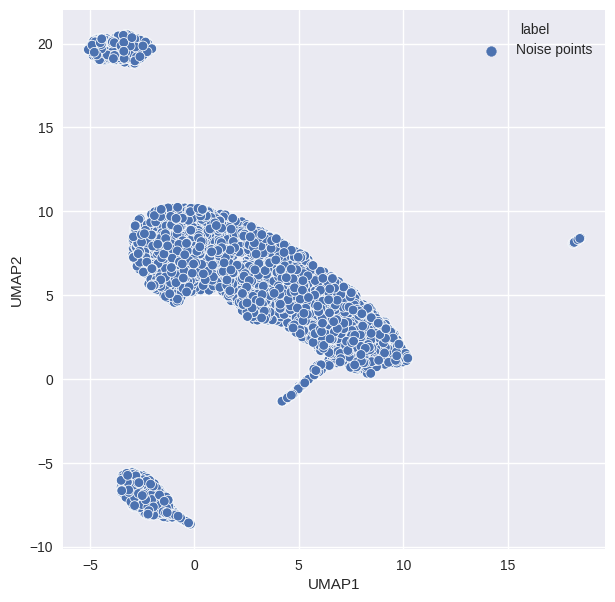

Execution time: 43.7 seconds


In [112]:
# Plot with labeled cluster

f, ax = plt.subplots(figsize=(7, 7))

p = sns.scatterplot(data=raw_data_prepared, x="UMAP1", y="UMAP2", hue="label", legend="full", palette="deep")

plt.show()



# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', round(elapsed_time,2), 'seconds')

In [113]:
final_data=raw_data_prepared_1.drop(raw_data_prepared_1.columns[[0, 1, 2,3]], axis=1) 

print(final_data)

           FSC-A      FSC-H        FSC-W        SSC-A        SSC-H  \
0     413.313782  84.938766  2433.010254  4240.269531   874.304138   
1     428.811676  90.012962  2381.943848  3895.276855   799.376099   
2     376.126373  99.617958  1887.844238  3560.158203   754.756531   
3      94.694931  45.175819  1048.071045  4248.828613  1020.472168   
4     328.453552  68.599258  2394.001953  3877.574219   804.560608   
...          ...        ...          ...          ...          ...   
6535   12.869205  24.589025   261.685944     6.242926     7.704660   
6536   26.782831  20.353662   657.936462     3.480913     3.058542   
6537   60.966801  53.260944   572.340637    21.972111    21.568253   
6538   59.506042  52.076817   571.329529    15.146958    14.826750   
6539    0.086919  16.344690     2.658945     9.705905    12.282741   

            SSC-W  VioBlue-A  VioBlue-H    VioBlue-W  Calcein-A  Calcein-H  \
0     2424.939941   3.486181   1.018596  1711.267090   1.433469   0.687797   
1  

In [114]:
final_data.replace({'label':{'Living cells':'CHO cells: Live', 'Dead cells':'CHO cells: Dead ', 'Late Apoptic cells':'CHO cells: Apoptic ', 'Early Apoptic cells':'CHO cells: Apoptic ','Oncotic cells':'CHO cells: Oncotic '}}, inplace = True)
print(final_data)

           FSC-A      FSC-H        FSC-W        SSC-A        SSC-H  \
0     413.313782  84.938766  2433.010254  4240.269531   874.304138   
1     428.811676  90.012962  2381.943848  3895.276855   799.376099   
2     376.126373  99.617958  1887.844238  3560.158203   754.756531   
3      94.694931  45.175819  1048.071045  4248.828613  1020.472168   
4     328.453552  68.599258  2394.001953  3877.574219   804.560608   
...          ...        ...          ...          ...          ...   
6535   12.869205  24.589025   261.685944     6.242926     7.704660   
6536   26.782831  20.353662   657.936462     3.480913     3.058542   
6537   60.966801  53.260944   572.340637    21.972111    21.568253   
6538   59.506042  52.076817   571.329529    15.146958    14.826750   
6539    0.086919  16.344690     2.658945     9.705905    12.282741   

            SSC-W  VioBlue-A  VioBlue-H    VioBlue-W  Calcein-A  Calcein-H  \
0     2424.939941   3.486181   1.018596  1711.267090   1.433469   0.687797   
1  

In [115]:
#export csv file

#final_data.to_csv('{}.csv'.format(fcspath))